In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Handles warnings

import warnings
warnings.filterwarnings('ignore')

In [195]:
loan=pd.read_csv("loan.csv")

In [197]:
loan.shape

(39717, 111)

**Checking null values present in each of the columns and calculating the percentage of it.**

In [200]:
null_value_cols=loan.isnull().mean()*100

In [202]:
null_value_cols

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

**First I calculated the mean value of the null value present in each column, then multiply with 100. So, it gave me the result of null value percentage of each column.** 

**Fetching those columns which are having more than or equal to 30% null values**

In [206]:
higher_null_value_cols = null_value_cols[null_value_cols.values >=30.00].index.tolist()

In [208]:
higher_null_value_cols

['desc',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_pa

In [210]:
len(higher_null_value_cols)

58

**Remove those columns which are having more than 30% null values**

In [213]:
loan.drop(higher_null_value_cols,axis=1, inplace=True)

In [215]:
loan.shape

(39717, 53)


**As you can see, there are only 53 columns left in this dataframe now as we already removed the other 52% due to null value percentage issue.**

In [218]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [220]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

**Getting Categorical Columns**

All the **Object** Data types variable are comes under the Categorical Variable Columns.

In [223]:
print(loan.select_dtypes(include='object').columns,'\n')
print('Total Number of Categorical Columns:',len(loan.select_dtypes(include='object').columns))

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object') 

Total Number of Categorical Columns: 22


**Getting Numerical Columns**

In [226]:
print(loan.select_dtypes(include=['int64','float64']).columns,'\n')
print('Total Number of Numerical Columns:',len(loan.select_dtypes(include=['int64','float64']).columns))

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object') 

Total Number of Numerical Columns: 31


**Now checking the remaining missing values columns**

In [229]:
null_value_cols_per = loan.isnull().mean() * 100

In [231]:
null_value_cols_per

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

# Imputation Of Missing Values:

In [234]:

# Let's take column emp_title which is having 6.191303% of missing Value.

loan['emp_title'].value_counts()

emp_title
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: count, Length: 28820, dtype: int64

In [236]:
loan['emp_title'].isnull().sum()

2459

**We can see that the mode of this column is coming as "US Army" but you can see there that the null values are more than the "US Army" count. So, let's keep the null value as it is.**

In [239]:
# Let's take column emp_length which is having 2.706650% of missing Value.

loan['emp_length'].value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [241]:
loan['emp_length'].isnull().sum()

1075

In [243]:
loan['emp_length']=loan['emp_length'].fillna(loan['emp_length'].mode()[0])

In [245]:
loan['emp_length'].isnull().sum()

0

**We can see that the mode of this column is coming as "10+ years", number of null values is less than the mode. So imputed the mode for null values**

In [248]:
# Again re-checking after imputing the missing value into emp_length column

loan['emp_length'].value_counts()

emp_length
10+ years    9954
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [250]:
# Let's take column title which is having 0.027696% of missing Value.

loan['title'].value_counts()

title
Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: count, Length: 19615, dtype: int64

In [252]:
loan['title'].isnull().sum()

11

In [254]:
loan['title']=loan['title'].fillna(loan['title'].mode()[0])

In [256]:
loan['title'].isnull().sum()

0

**We can see that the mode of this column is coming as "Debt Consolidation", number of null values is less than the mode. So imputed the mode for null values**

In [259]:
# Again re-checking after imputing the missing value into title column

loan['title'].value_counts()

title
Debt Consolidation                  2195
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: count, Length: 19615, dtype: int64

In [261]:
loan.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                       0
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                            0
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [263]:
# Let's take column pub_rec_bankruptcies which is having 1.754916% of missing Value.

loan['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [265]:
loan['pub_rec_bankruptcies']=loan['pub_rec_bankruptcies'].fillna(loan['pub_rec_bankruptcies'].mode()[0])

In [267]:
loan['pub_rec_bankruptcies'].isnull().sum()

0

**We can see that the mode of this column is coming as "0.0", number of null values is less than the mode. So imputed the mode for null values**

In [270]:
# Again re-checking after imputing the missing value into title column

loan['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    38036
1.0     1674
2.0        7
Name: count, dtype: int64

**The missing values for the remaining fields is lessthan 1%, it won't impact analysis. So leave those as it is**

**Filtering data frame to fetch charged off borrowers**

In [274]:
loan_default=loan[loan['loan_status']=='Charged Off']

In [276]:
loan_default.shape

(5627, 53)

# Handling Outliers: 

* 'loan_amnt'
* 'funded_amnt'
* 'installment'
* 'annual_inc'

In [279]:
loan_default.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,5.627000e+03,5.627000e+03,5627.000000,5627.000000,5627.000000,5627.000000,5.627000e+03,5627.000000,5627.000000,5627.000000,...,5627.000000,5627.000000,5627.000000,5621.0,5627.0,5627.0,5621.0,5627.0,5627.000000,5626.0
mean,6.978440e+05,8.677521e+05,12104.385108,11753.398792,10864.521324,336.175006,6.242730e+04,14.000624,0.170606,1.058113,...,672.101872,87.565940,326.020833,0.0,1.0,0.0,0.0,0.0,0.065754,0.0
std,2.163767e+05,2.723270e+05,8085.732038,7760.516335,7661.750540,217.051841,4.777601e+04,6.585577,0.534986,1.154136,...,1720.742949,386.590605,528.983051,0.0,0.0,0.0,0.0,0.0,0.249304,0.0
min,6.141900e+04,8.035300e+04,900.000000,900.000000,0.000000,22.790000,4.080000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.297245e+05,6.849050e+05,5600.000000,5575.000000,5000.000000,168.555000,3.700000e+04,9.050000,0.000000,0.000000,...,0.000000,0.000000,112.885000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.969370e+05,8.881580e+05,10000.000000,10000.000000,9401.209477,293.870000,5.300000e+04,14.290000,0.000000,1.000000,...,173.040000,2.513200,238.250000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.548760e+05,1.066578e+06,16500.000000,16000.000000,15000.000000,457.840000,7.500000e+04,19.290000,0.000000,2.000000,...,595.655000,9.365000,405.705000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077430e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,1.250000e+06,29.850000,8.000000,8.000000,...,29623.350000,7002.190000,12818.380000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


<Axes: xlabel='loan_amnt'>

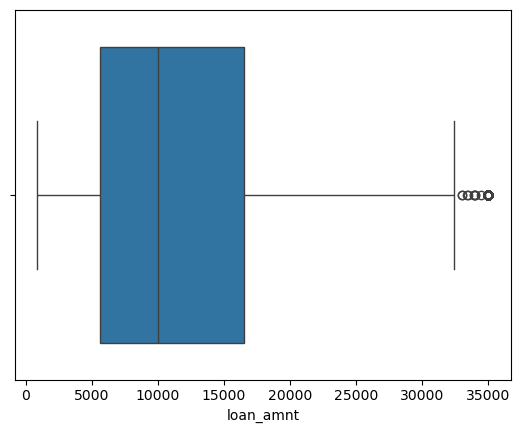

In [281]:
sns.boxplot(x=loan_default['loan_amnt'])

**As the outliers are almost near to the data, Keeping the data will be good for the analysis purpose**

<Axes: xlabel='funded_amnt'>

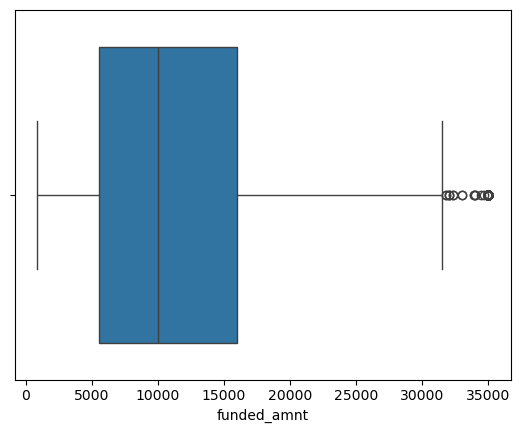

In [284]:
sns.boxplot(x=loan_default['funded_amnt'])


**As the outliers are almost near to the data, Keeping the data will be good for the analysis purpose**

<Axes: xlabel='installment'>

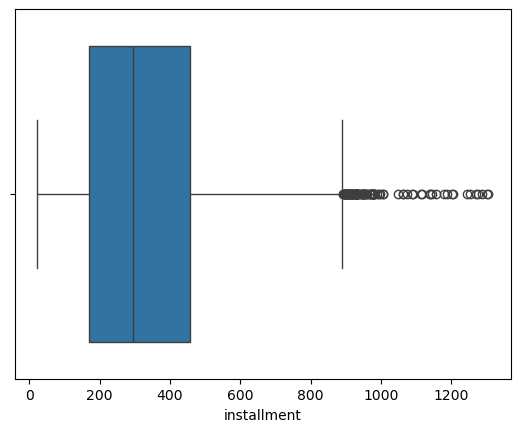

In [287]:
sns.boxplot(x=loan_default['installment'])

**As the outliers are almost near to the data, Keeping the data will be good for the analysis purpose**

# Univariate Analysis

### Categorical Univariate Analysis: 

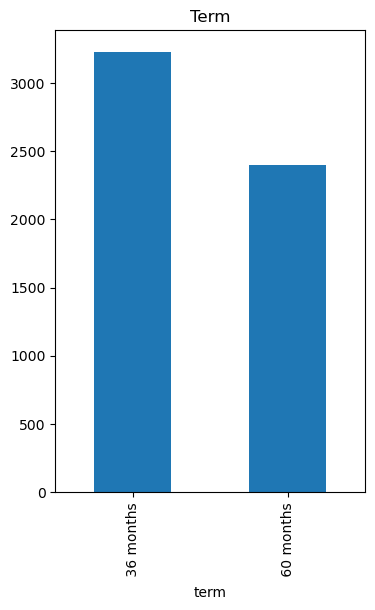

In [292]:
plt.figure(figsize=(4,6))
loan_default['term'].value_counts().plot(kind = 'bar')
plt.title('Term')
plt.show()

**There are more number of borrowers with 36 months tenure**

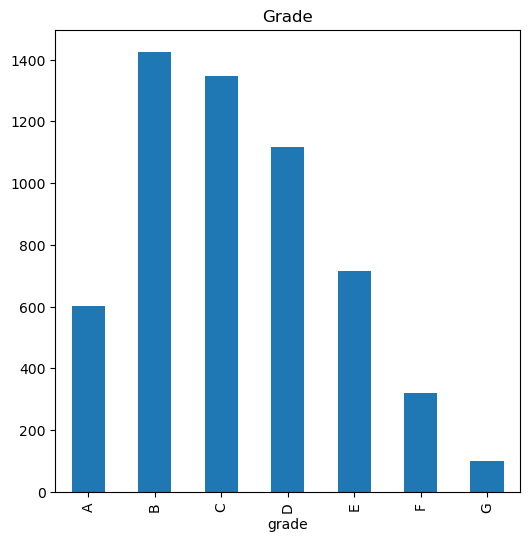

In [295]:
plt.figure(figsize=(6,6))
loan_default['grade'].value_counts().sort_index().plot(kind = 'bar')
plt.title('Grade')
plt.show()

**There are more number of customers with Grade as B**

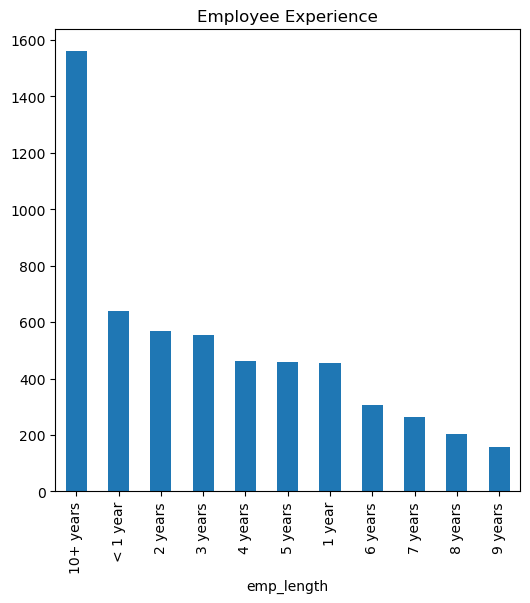

In [298]:
plt.figure(figsize=(6,6))
loan_default['emp_length'].value_counts().plot(kind = 'bar')
plt.title('Employee Experience')
plt.show()

**There are more number of borrowers with 10+ years of experience**

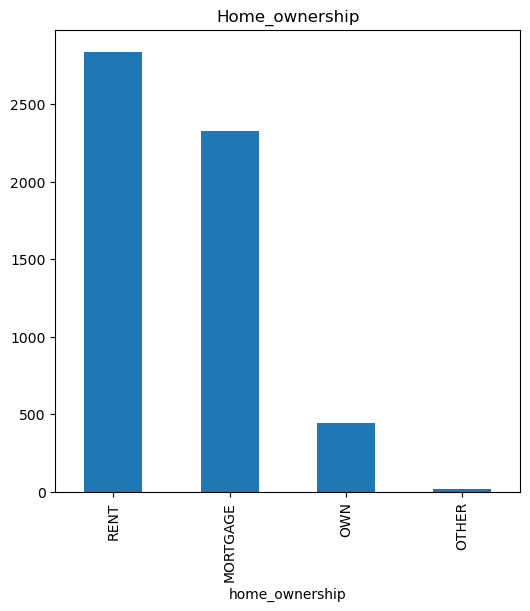

In [301]:
plt.figure(figsize=(6,6))
loan_default['home_ownership'].value_counts().plot(kind = 'bar')
plt.title('Home_ownership')
plt.show()

**There are more number of borrowers with Rent house**

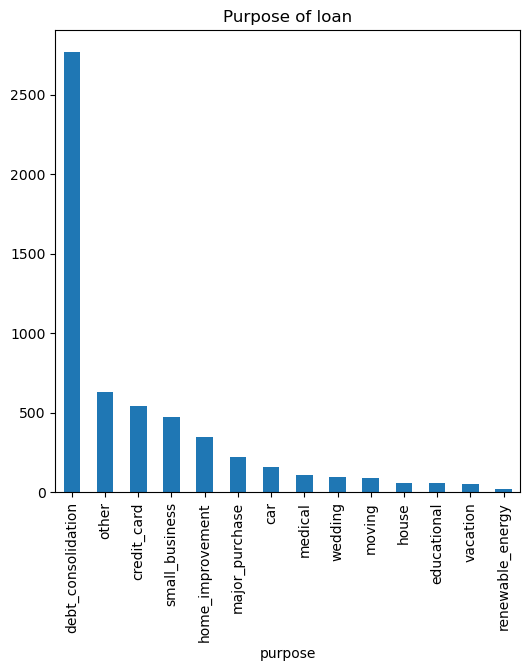

In [304]:
plt.figure(figsize=(6,6))
loan_default['purpose'].value_counts().plot(kind = 'bar')
plt.title('Purpose of loan')
plt.show()

**Most of the people took loan for debt consolidation.**

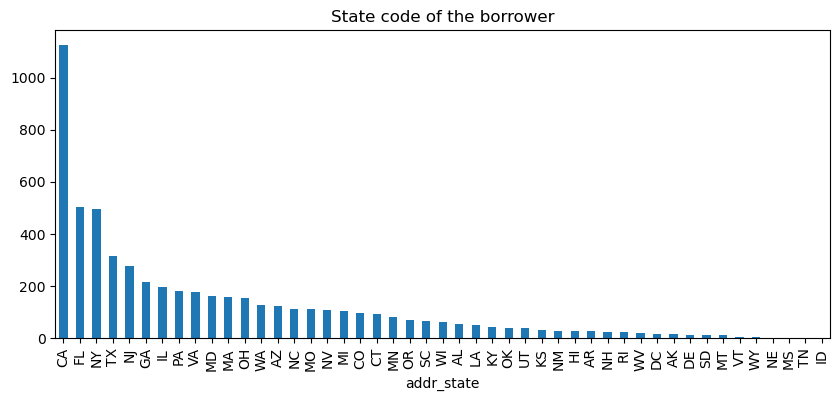

In [307]:
plt.figure(figsize=(10,4))
loan_default['addr_state'].value_counts().plot(kind = 'bar')
plt.title('State code of the borrower')
plt.show()

**The more number of borrowers are from the state with state code CA**

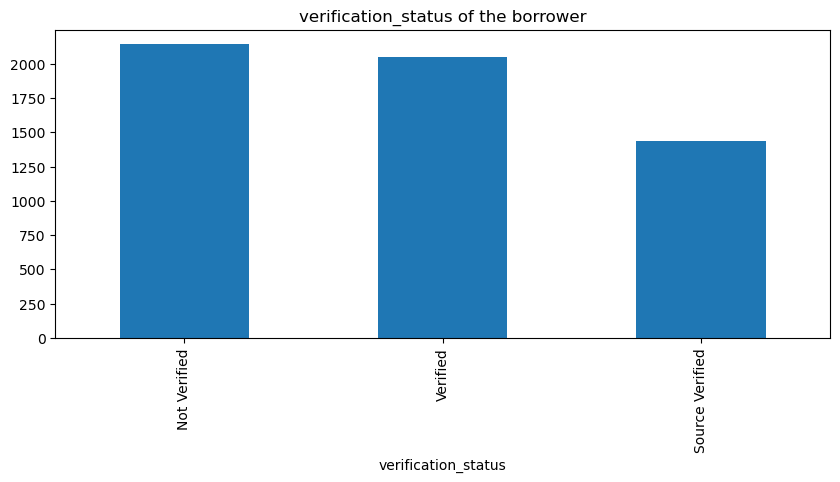

In [310]:
plt.figure(figsize=(10,4))
loan_default['verification_status'].value_counts().plot(kind = 'bar')
plt.title('verification_status of the borrower')
plt.show()

**Most of the applications are not verified as per the data given**

# Univariate Analysis for Continious Variable

In [314]:
continious_data_cols = ['loan_amnt','funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc',
              
                        'revol_bal','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries']

In [316]:
continious_data_cols

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'annual_inc',
 'revol_bal',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries']

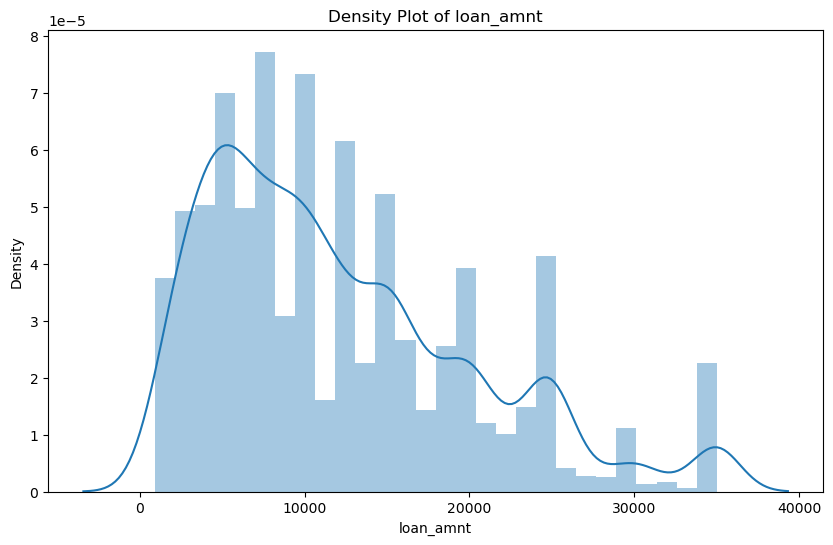

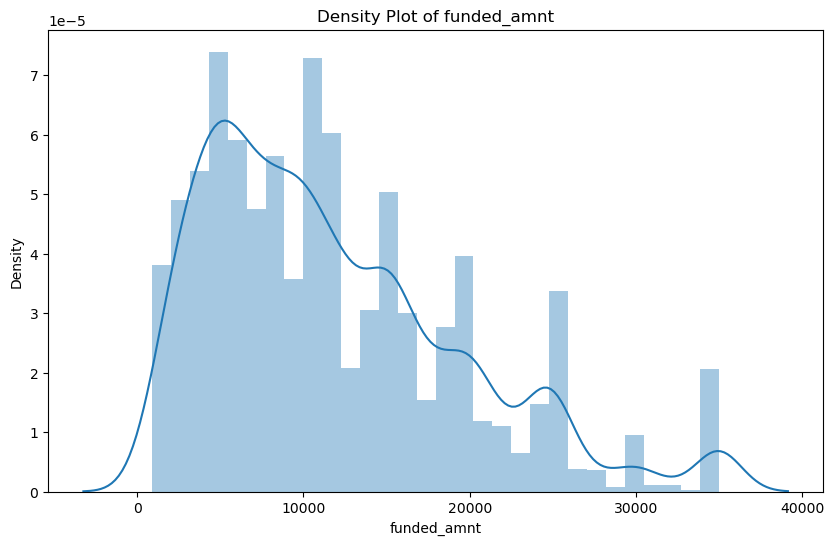

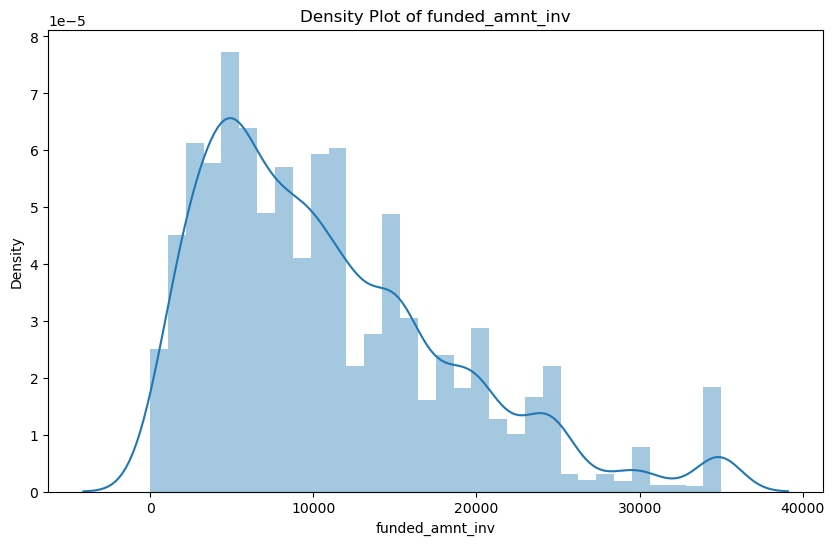

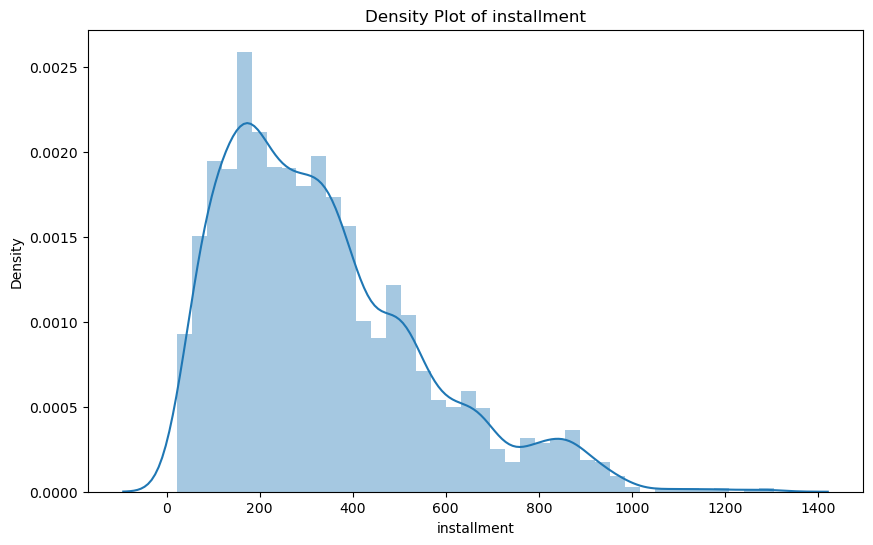

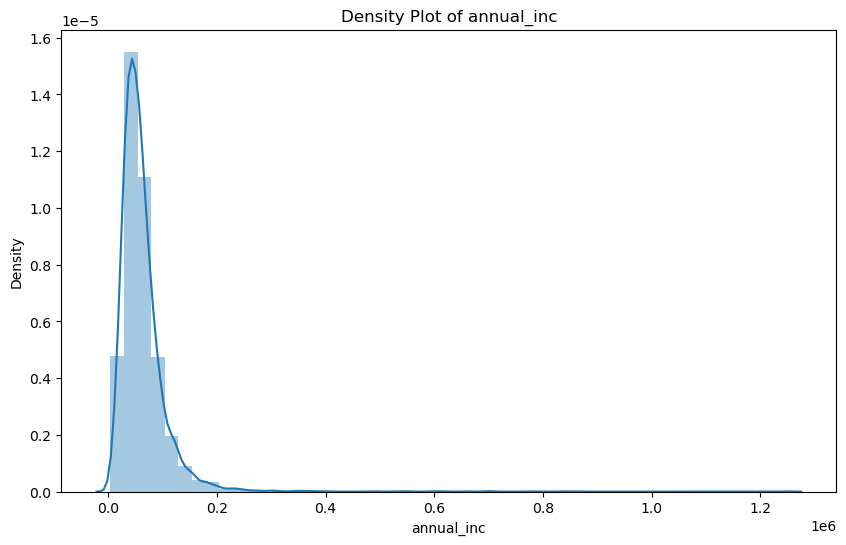

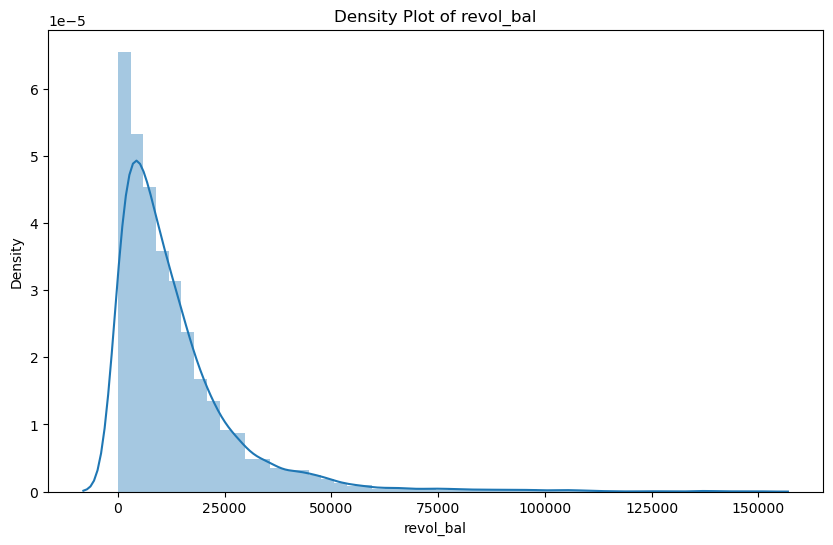

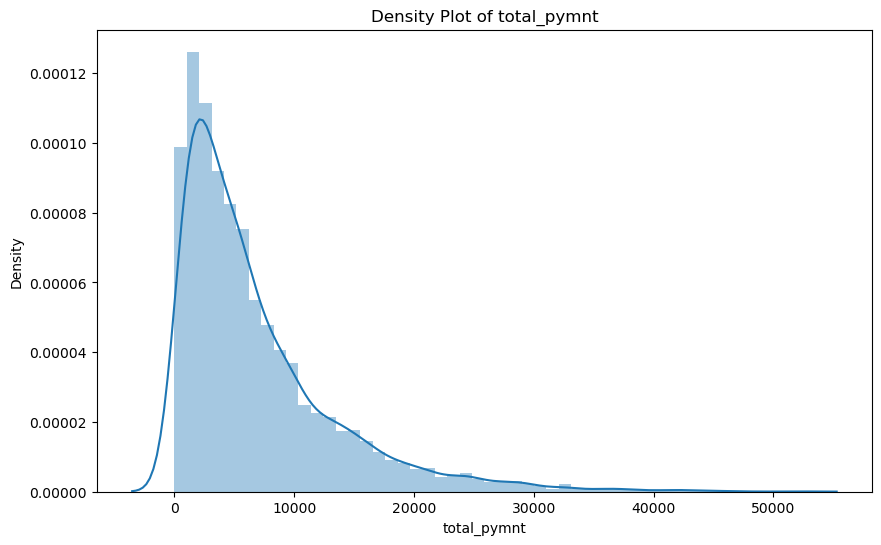

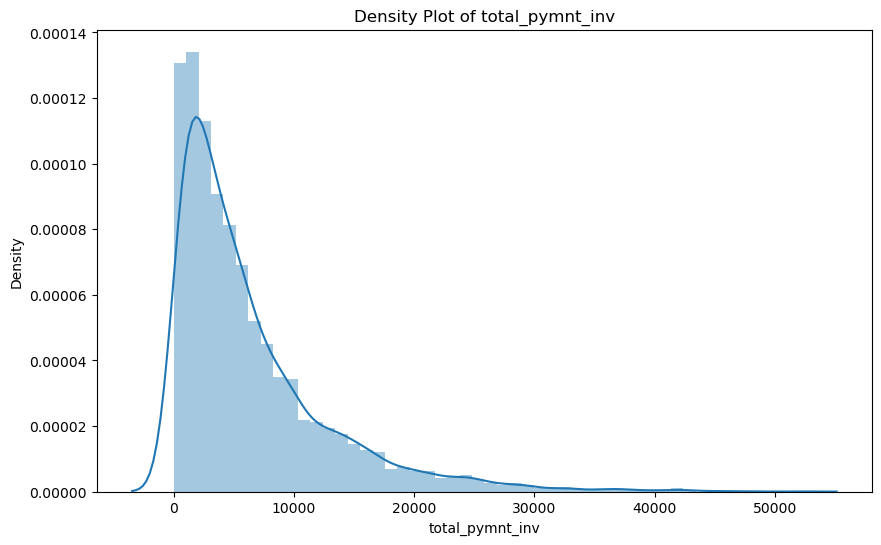

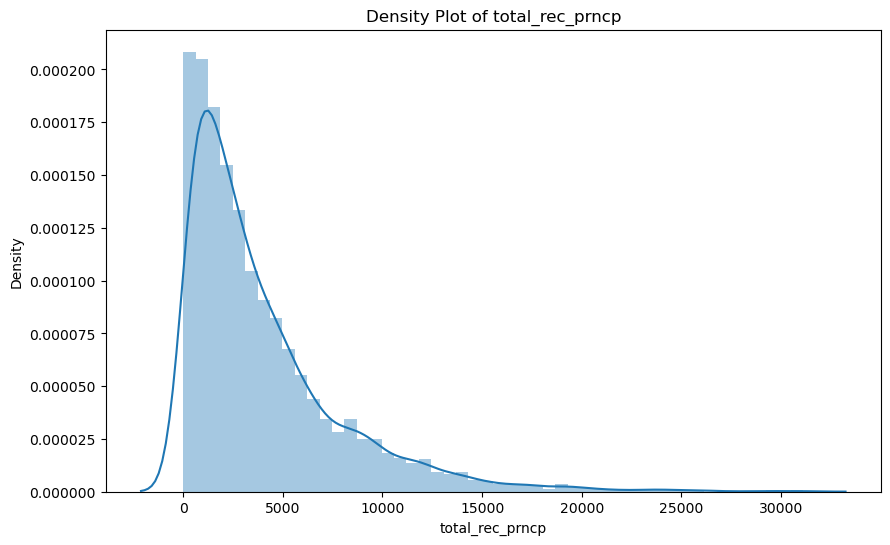

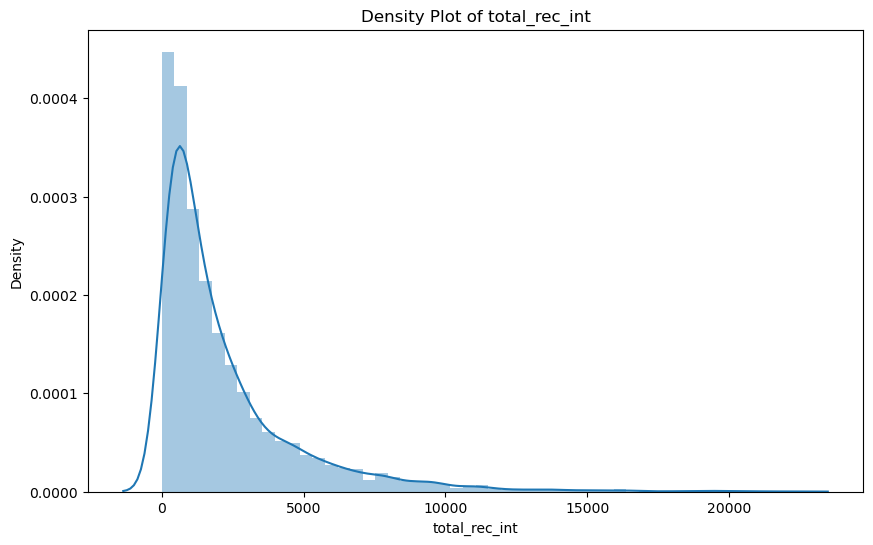

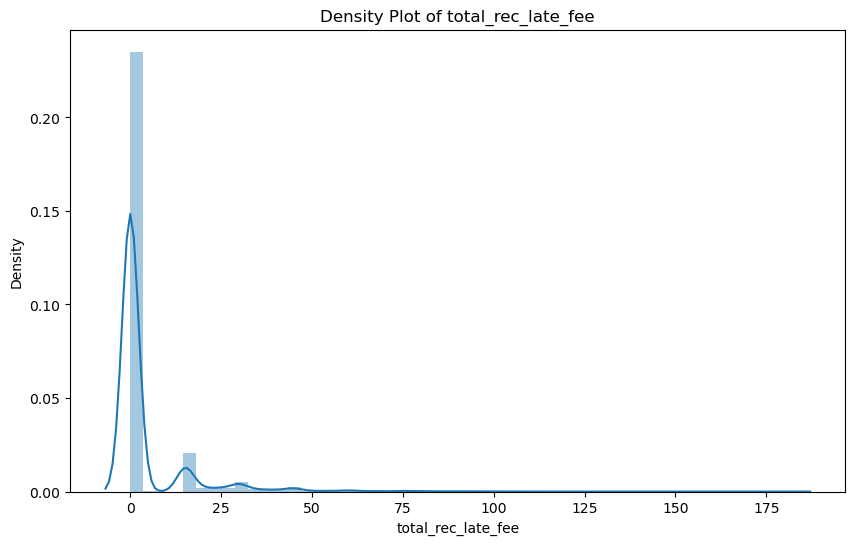

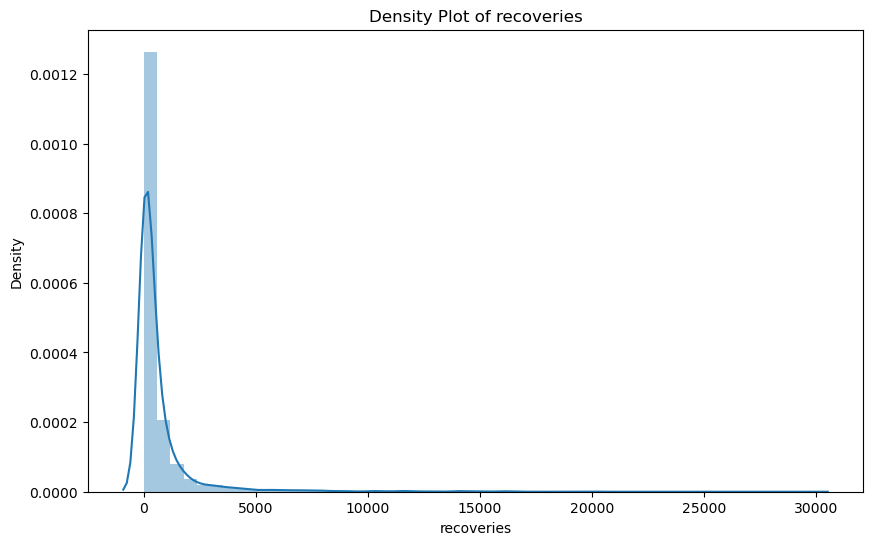

In [318]:
for col in continious_data_cols:
    plt.figure(figsize=(10, 6))
    sns.distplot(loan_default[col])
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

**Most density of loan amount is more around 5000**<br>
**There are more number of people with funding amount around 1000**<br>
**The density of funding amount by investors is more around 5000**<br>
**Most of the installment amount are around 150-180**<br>
**Most of the borrowers with annual income 25000-50000**<br>
**Most people returned amount is between 1000-2000 in the total amount funded**<br>
**Most people returned amount given by investors is between 1000-2000 in the total amount funded by investors and 0-1000 is also nearer to this**<br>
**Most people returned amount is between 500-1000 in the interest amount**<br>
**Recovery of late payment is very less**<br>
**Recoveries are minimal**<br>

**Most of the defaulters took loan amount around 5K and their annual income is reported between 25K-50K**

# Bivariate Analysis

In [322]:
pd.crosstab(loan_default['term'], loan_default['grade'])

grade,A,B,C,D,E,F,G
term,,,,,,,
36 months,565,985,844,580,176,56,21
60 months,37,440,503,538,539,263,80


<Axes: xlabel='term', ylabel='count'>

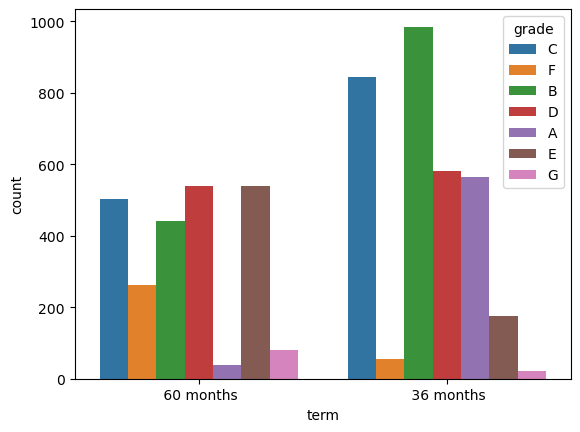

In [323]:
sns.countplot(x='term', hue='grade', data=loan_default)

**Most of the defaulters with 36 months as loan and grade as B**

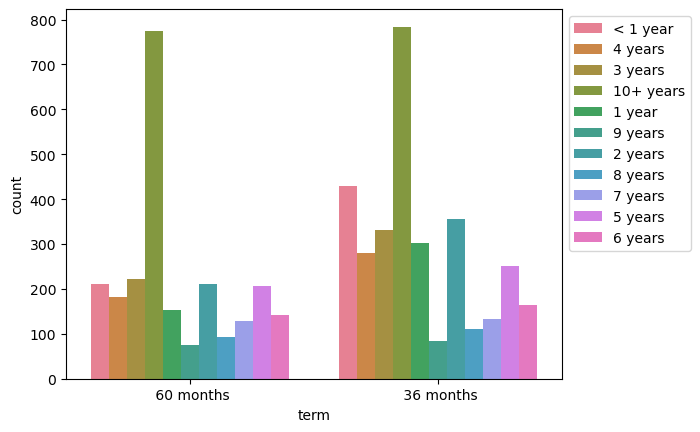

In [325]:
sns.countplot(x='term', hue='emp_length', data=loan_default)
plt.legend(bbox_to_anchor=(1, 1))

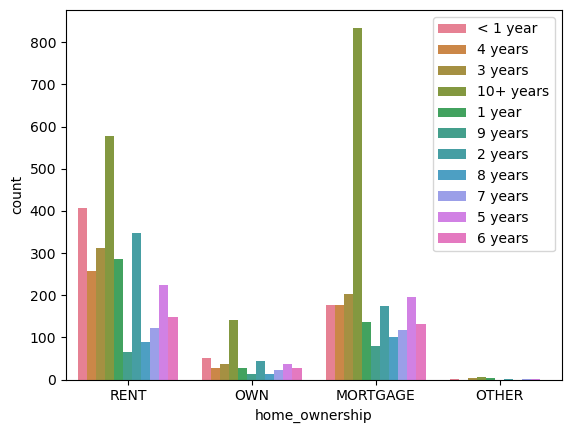

In [328]:
sns.countplot(x='home_ownership', hue='emp_length', data=loan_default)
plt.legend(bbox_to_anchor=(1, 1))

**There are more defaulters with home Ownership as Mortgage and with 10+years of experience**

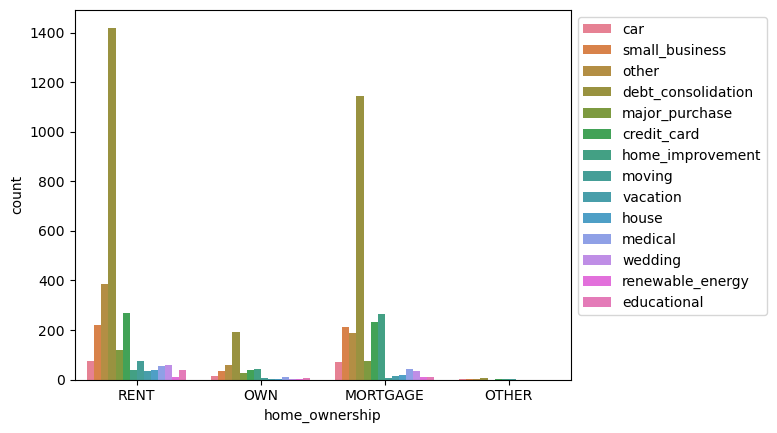

In [332]:
sns.countplot(x='home_ownership', hue='purpose', data=loan_default)
plt.legend(bbox_to_anchor=(1, 1))

**There are more number of defaulters with home ownership as Rent and Purpose as debt_consolidation**

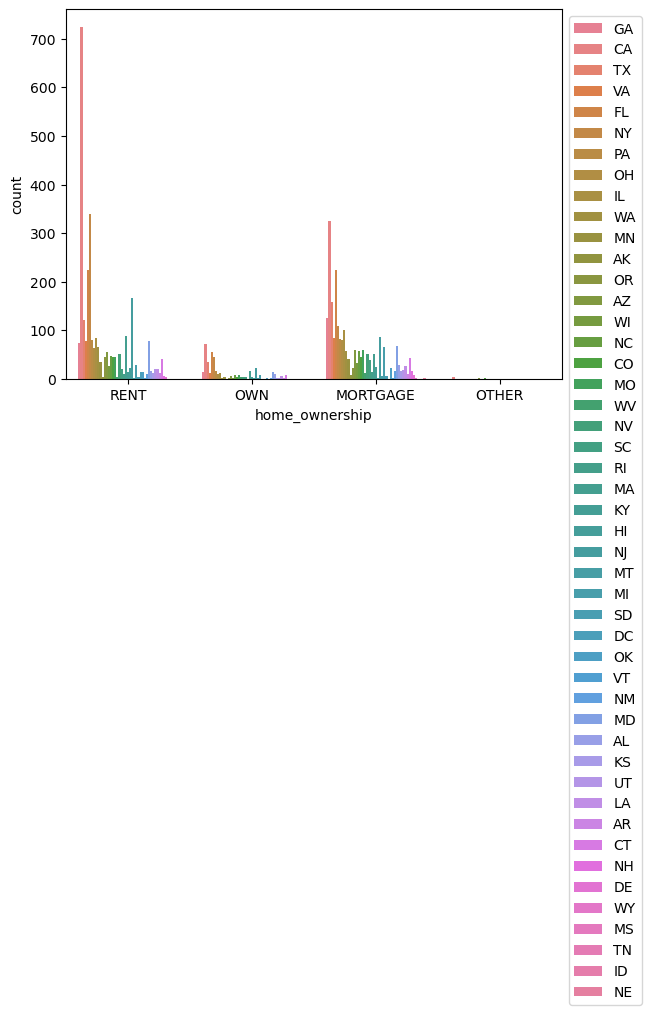

In [336]:

sns.countplot(x='home_ownership', hue='addr_state', data=loan_default)
plt.legend(bbox_to_anchor=(1, 1))

**There are more number of defaulters with home ownership as Rent and addr_state as CA**

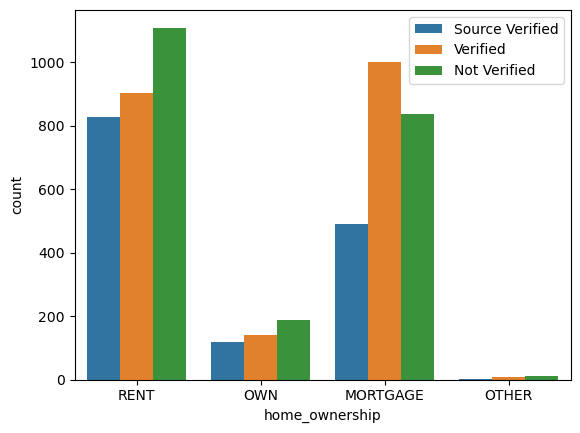

In [338]:
sns.countplot(x='home_ownership', hue='verification_status', data=loan_default)
plt.legend(bbox_to_anchor=(1, 1))

**There are more number of defaulters with home ownership as Rent and addr_state as Not Verified**

<font color='red'><b>Most of the defaulters with Home_ownership as Rent and Purpose is debt_consolidation and addr_state as CA and the emp_length is 10+ years and the verification status as Not verified.</b> </font>

In [343]:
corr_for_defaulters = loan_default[continious_data_cols]
corr_for_defaulters.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,revol_bal,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries
1,2500,2500,2500.0,59.83,30000.0,1687,1008.71,1008.71,456.46,435.17,0.0,117.08
8,5600,5600,5600.0,152.39,40000.0,5210,646.02,646.02,162.02,294.94,0.0,189.06
9,5375,5375,5350.0,121.45,15000.0,9279,1476.19,1469.34,673.48,533.42,0.0,269.29
12,9000,9000,9000.0,305.38,30000.0,10452,2270.70,2270.70,1256.14,570.26,0.0,444.30
14,10000,10000,10000.0,325.74,100000.0,11997,7471.99,7471.99,5433.47,1393.42,0.0,645.10


In [345]:
corr_for_defaulters.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,revol_bal,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries
loan_amnt,1.000000,0.979134,0.907129,0.925911,0.352359,0.313101,0.680814,0.643174,0.551302,0.699167,0.087517,0.310185
funded_amnt,0.979134,1.000000,0.926996,0.953826,0.347131,0.296956,0.698496,0.660695,0.569719,0.712395,0.094089,0.316077
funded_amnt_inv,0.907129,0.926996,1.000000,0.858041,0.314505,0.254045,0.685354,0.726049,0.550112,0.718712,0.067972,0.301537
installment,0.925911,0.953826,0.858041,1.000000,0.358656,0.299930,0.666864,0.616589,0.577424,0.628887,0.119871,0.300368
annual_inc,0.352359,0.347131,0.314505,0.358656,1.000000,0.379449,0.279975,0.262635,0.239091,0.263186,0.062817,0.134942
revol_bal,0.313101,0.296956,0.254045,0.299930,0.379449,1.000000,0.227425,0.203407,0.188357,0.215186,0.029719,0.121192
total_pymnt,0.680814,0.698496,0.685354,0.666864,0.279975,0.227425,1.000000,0.968039,0.914954,0.896605,0.166237,0.406369
total_pymnt_inv,0.643174,0.660695,0.726049,0.616589,0.262635,0.203407,0.968039,1.000000,0.879115,0.885648,0.140470,0.382478
total_rec_prncp,0.551302,0.569719,0.550112,0.577424,0.239091,0.188357,0.914954,0.879115,1.000000,0.752971,0.150594,0.096637
total_rec_int,0.699167,0.712395,0.718712,0.628887,0.263186,0.215186,0.896605,0.885648,0.752971,1.000000,0.143954,0.228767


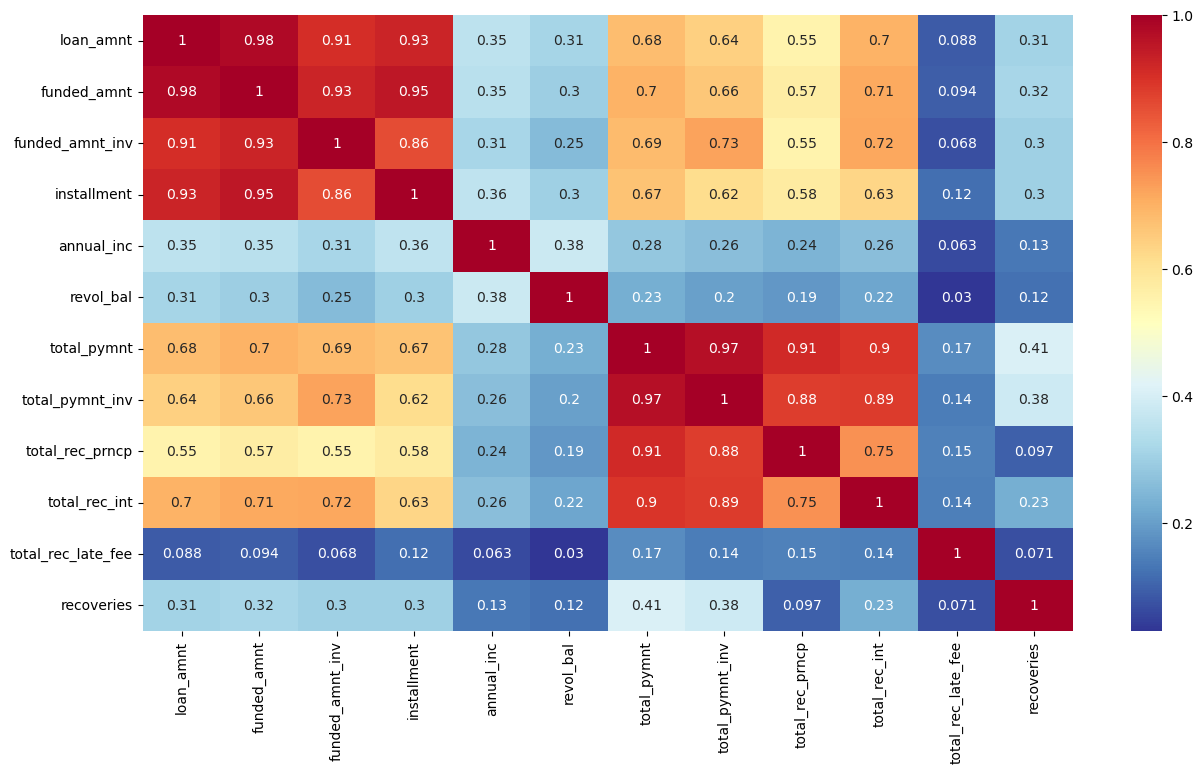

In [347]:
plt.figure(figsize = (15,8))
sns.heatmap(corr_for_defaulters.corr(), cmap = 'RdYlBu_r', annot = True)
plt.show()

**loan_amnt,funded_amnt,funded_amnt_inv,installment are highly correlated**<br>
**total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int are also highly correlated**<br>
**loan_amnt and annual_inc has weak correlation**<br>
**annual_inc and total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int are also have weak correlation**

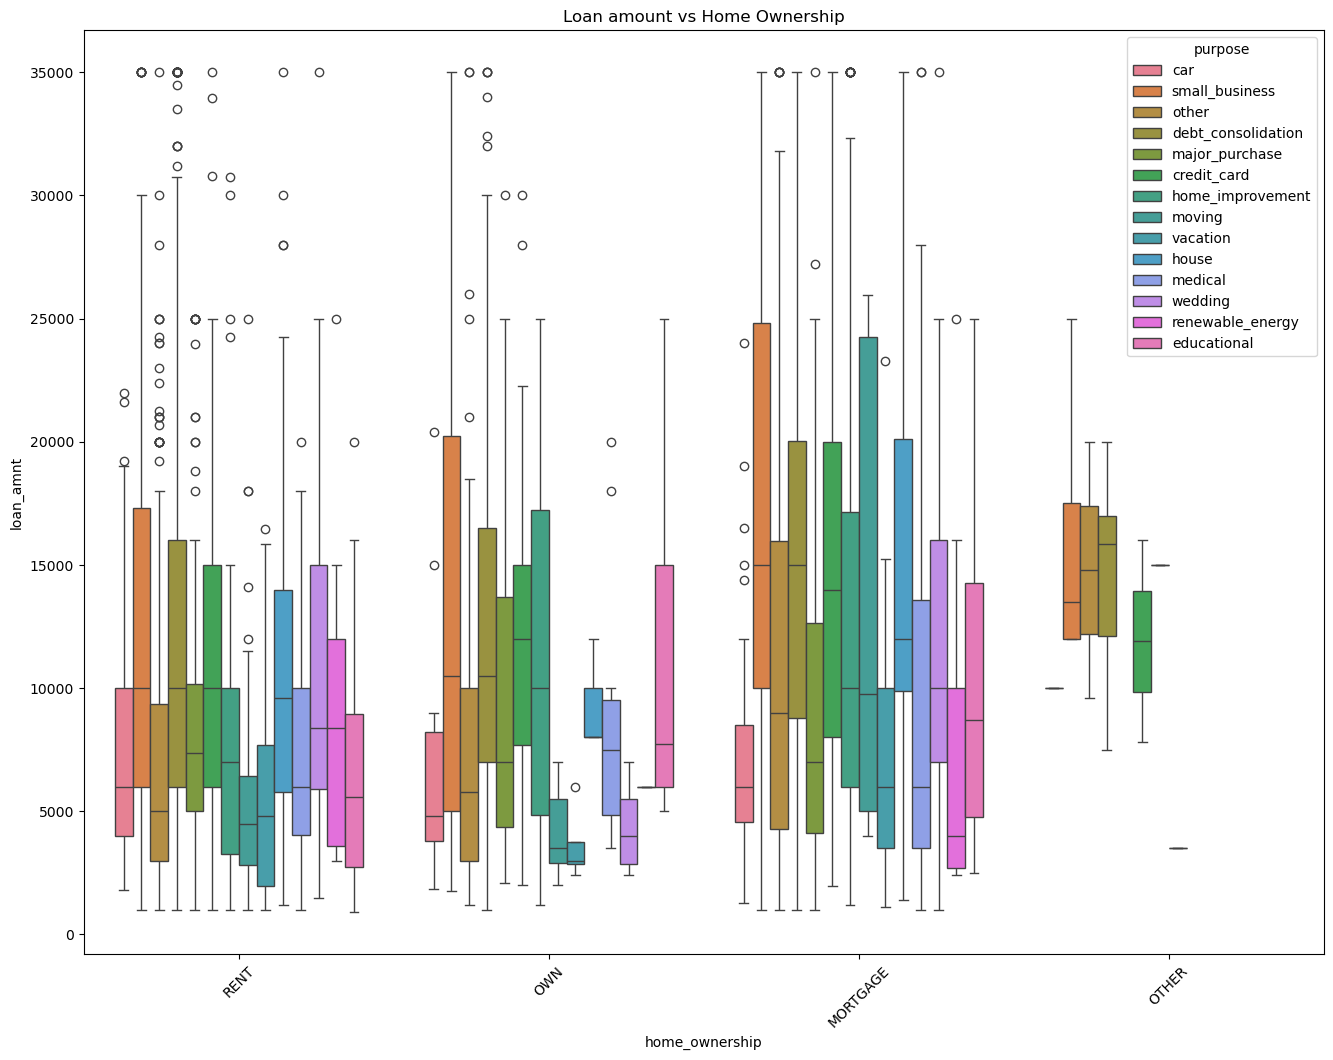

In [350]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =loan_default, x='home_ownership',y='loan_amnt', hue ='purpose',orient='v')
plt.title('Loan amount vs Home Ownership')
plt.show()

**As per the above analysis people with small_business and home_ownership as mortagage took more loan amount**

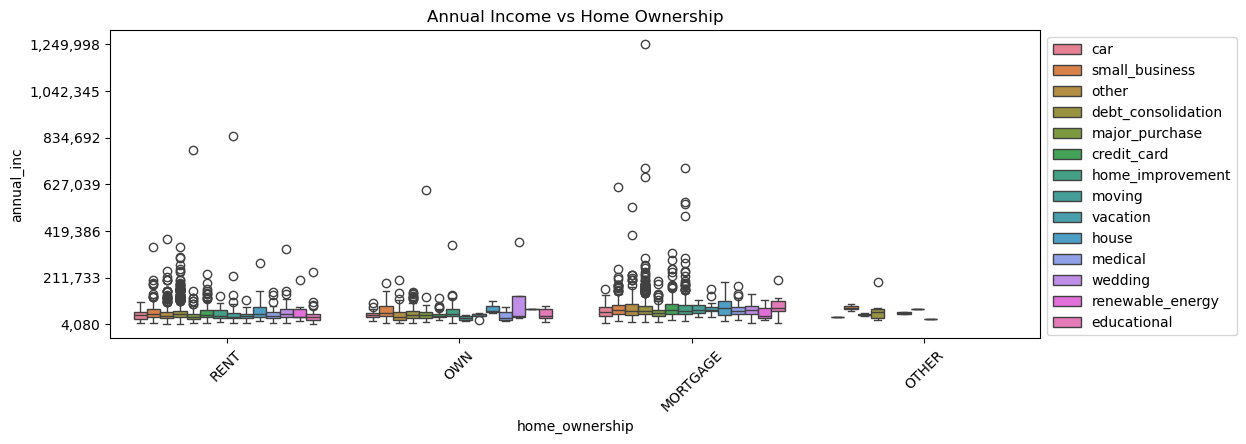

In [353]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=45)
sns.boxplot(data =loan_default, x='home_ownership',y='annual_inc', hue ='purpose',orient='v')
plt.title('Annual Income vs Home Ownership')
min_income = loan_default['annual_inc'].min()
max_income = loan_default['annual_inc'].max()

# Dynamically set y-ticks with a range and step size based on the data
plt.yticks(range(int(min_income), int(max_income), int((max_income - min_income) / 6)),
           [f'{x:,.0f}' for x in range(int(min_income), int(max_income), int((max_income - min_income) / 6))])
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [354]:
groupdata=loan_default.groupby(['home_ownership','purpose'])['annual_inc'].sum()

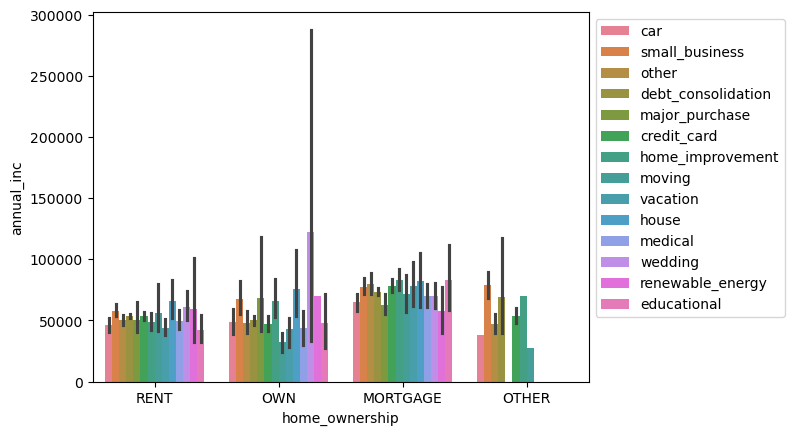

In [357]:
sns.barplot(x='home_ownership', y='annual_inc', hue='purpose', data=loan_default)
plt.legend(bbox_to_anchor=(1, 1))

**As per the above plot people with own house and purpose as Wedding has more income and more outliers as well**

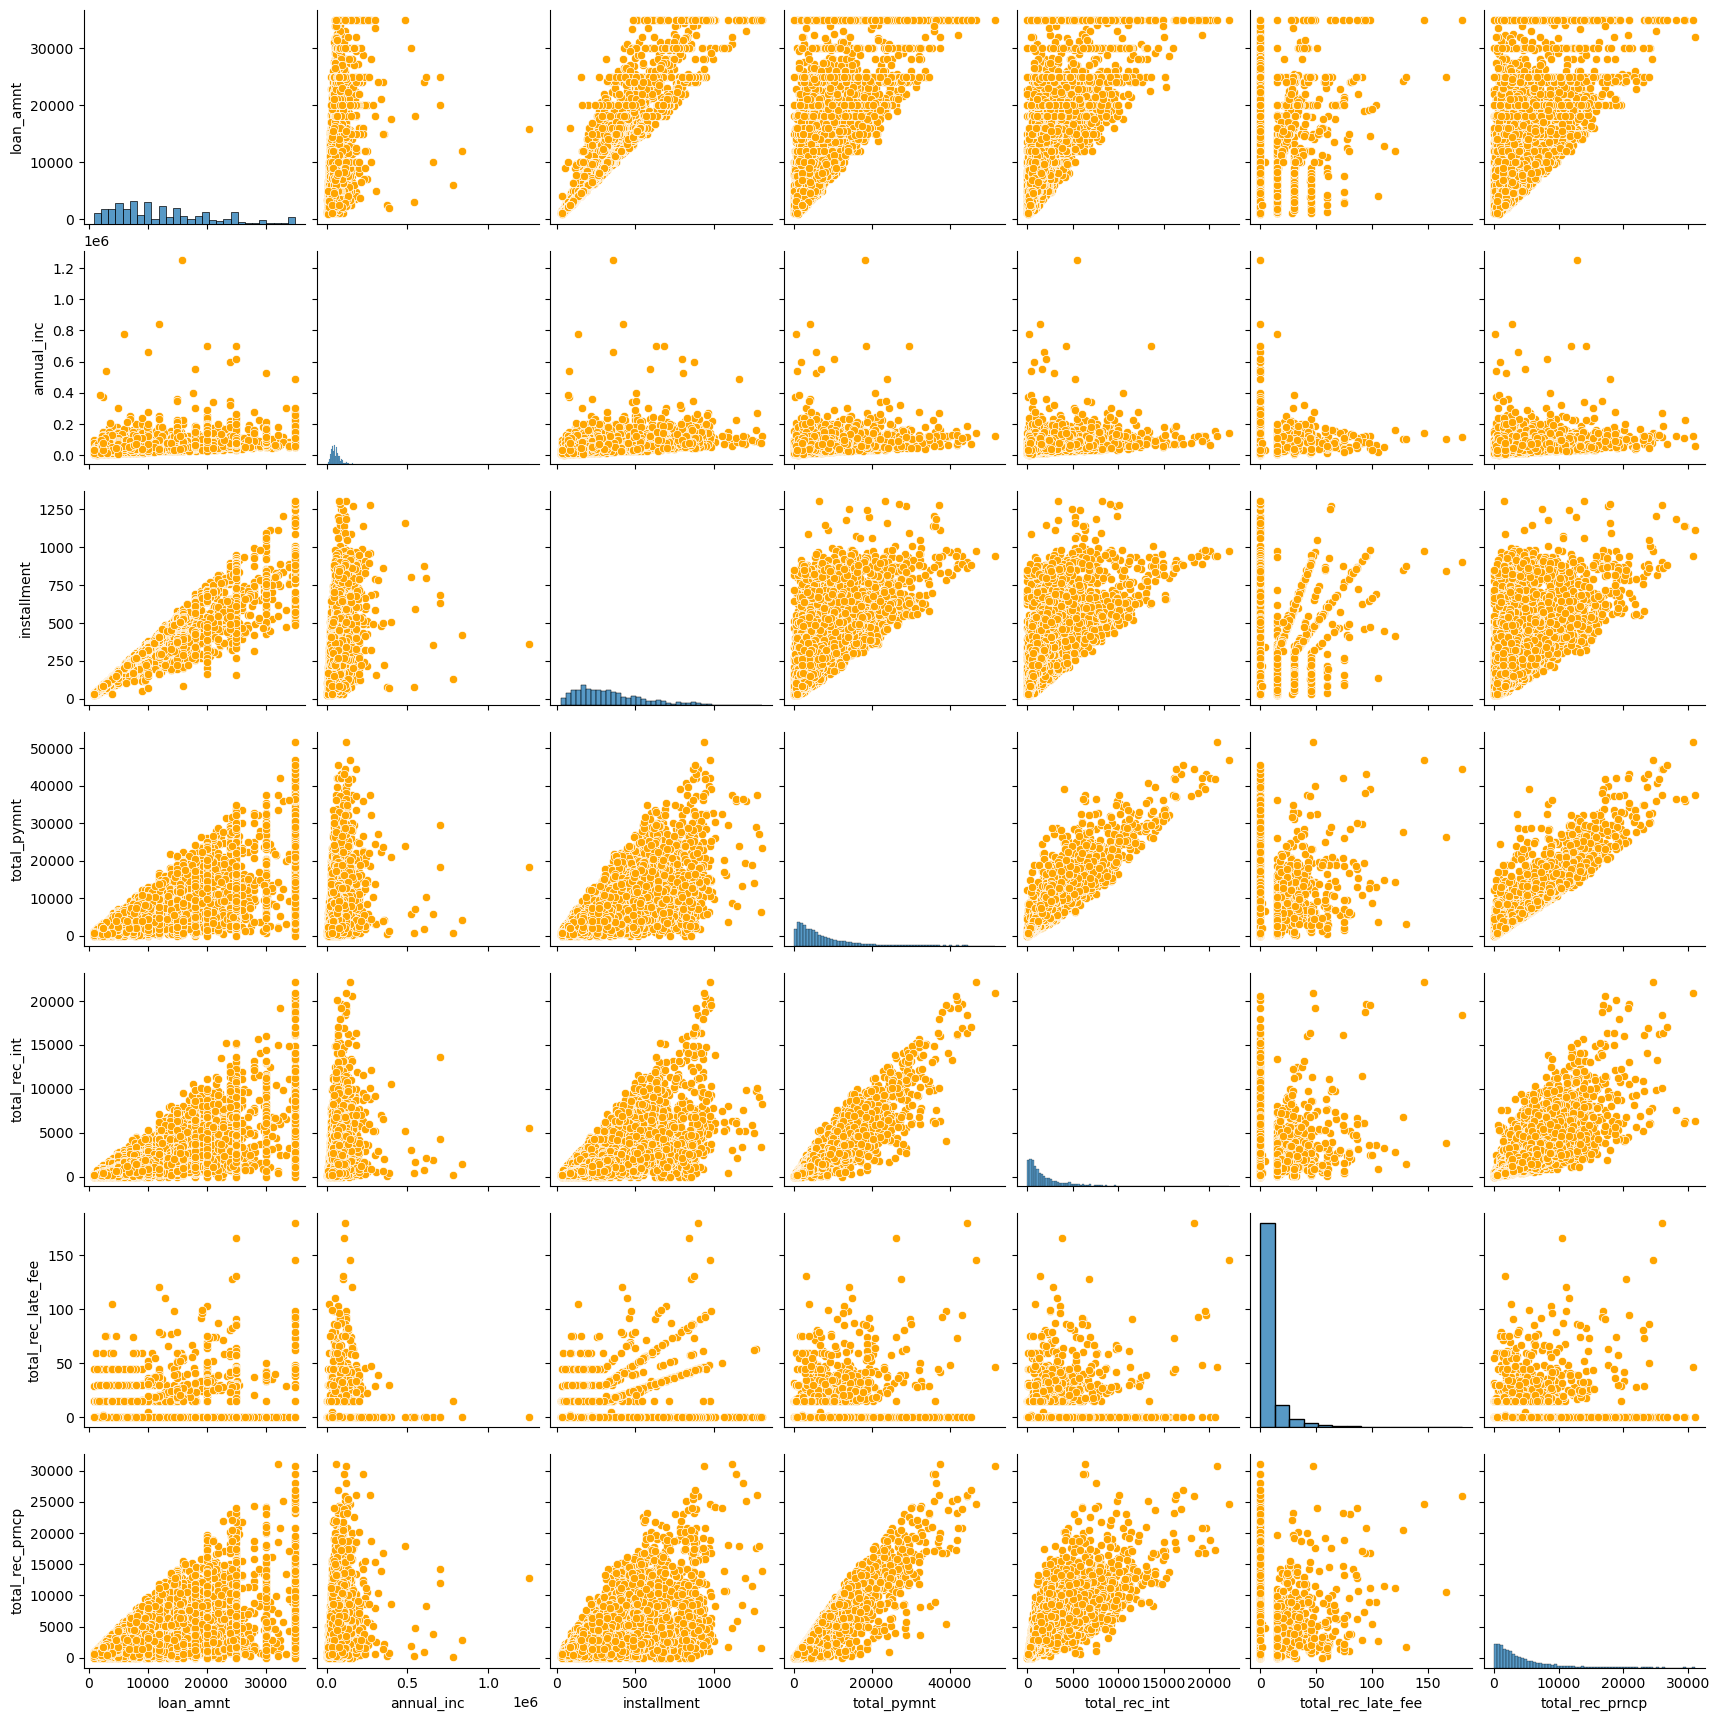

In [359]:
sns.pairplot(loan_default[['loan_amnt', 'annual_inc', 'installment', 'total_pymnt','total_rec_int', 'total_rec_late_fee', 'total_rec_prncp']],plot_kws={'color': 'orange'})
plt.show()

**There are more defaulters with home Ownership as Mortgage and with 10+years of experience**<br>
**There are more number of defaulters with home ownership as Rent and addr_state as CA**<br>
**There are more number of defaulters with home ownership as Rent and verification status as Not Verified**<br>
**Most of the defaulters with Home_ownership as Rent and Purpose is debt_consolidation and addr_state as CA and the emp_length is 10+ years and the verification status as Not verified.**<br>
**loan_amnt,funded_amnt,funded_amnt_inv,installment are highly correlated**<br>
**total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int are also highly correlated**<br>
**People with small_business and home_ownership as mortagage took more loan amount**<br>
**People with own house and purpose as Wedding has more income and more outliers as well**<br>